In [1]:
import numpy as np

First the circle estimator

In [15]:
points = np.random.rand(2000,2) * 2 - 1
rs = np.linalg.norm(points, axis=1)
piguess = 4 * np.average(rs < 1.0)
print(piguess)

3.126


In [16]:
errors = np.zeros(200)
for nsample in range(1,200):
    points = np.random.rand(2000, nsample, 2) * 2 - 1
    rs = np.linalg.norm(points, axis=2)
    piguess = 4 * np.average(rs < 1.0,axis =1)    
    errors[nsample]=np.average((piguess-np.pi)**2)


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


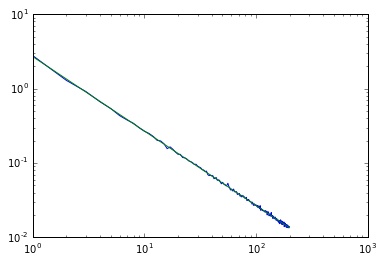

In [28]:

expectedsqerror = (4 - np.pi)**2 * (np.pi/4)+ np.pi**2 * (4 - np.pi)/4
plt.plot(errors)
plt.plot(1/np.arange(200) * expectedsqerror)
plt.yscale('log')
plt.xscale('log')

Nice. Lookin Good so far


Importance Sampling
Metropolis Sampling
Rejection Sampling
 
It's interesting I think that metropolis sampling may be viewable from a rejection sampling perspective. The rejection step of a suggested move


If the underlying matrix is approximately low rank, sampling can work.
Otherwise, can miss clutch points?
see interpolative decomposition.

How to find such a hierarchical structure?
Use distance metric.
Use K itself for clustering.
We want to find (hierarchical) cluster labels such that the addition of the new point does not change the rank of the intercluster matrix much.
Interesting Definition of distance maybe. Close things are the things you can know themost about.
rank ~ dimensionless distance
curvature and diff geo of rank?
metric
embedding of graph
Metric from hierarchical deocomp of clustered point Gf.

Regularization?

use monte carlo to add correlation jastrow factors to my antisym? Correspond to quasi bosons. However, we're already using up the summation in going to the gramian, so where would the probablisitc summations come from?
Perhaps writing the V factors in expontential as low rank sums, and use those sums for the porbability

So building a matrix using random sampling

Other ideas:
Trade off between summation and sampling.
Using a joint sampling distro instead of unique ones
Markov chain monte carlo is an example. It's hard to sample from correlated high-d distros.

Block matrices and Monte carlo

Inverting a monte carlo matrix is the reverse process. Apparently requires detailed Balance condition?

Importance sampling for a monte carlo process is a matrix decompoisiton. Probability matrices are column sum to 1. The weight matrix is diagonal usually? Or sparse, or only one nonzero element per column.
A = WM

The inverse markov process is easy? M*pi = p(i, i+1)
P(i|i-1)P(i-1) = P(i,i-1)
P(i-1|i)P(i) = P(i,i-1)
tranpose and renormalize.

Variational Monte Carlo - Ceperley mentions Feynman-Kac, Jastrow Slater form can be taken to higher order?


In [188]:

def freeG(x,y):
    return np.log(np.linalg.norm(x-y,axis=0))
#green's function in presence of metallic circle. Use image charge at conjugate point
def circleG(x,y):
    origin = np.zeros(2)
    return freeG(x,y) - freeG(x,conjugate(y)) - freeG(origin, y) - freeG(x, origin)
#conjugate point
def conjugate(x):
    return x/np.linalg.norm(x)**2


Check the derivative is zero tangential to the circle

In [171]:
dx = 0.01
(circleG(np.array([1.0,0.0]), np.array([0.4,-.23])) - circleG(np.array([1.0+dx,0.0]), np.array([0.4,-.23])))/dx

-1.8967873537957147

In [175]:
dx = 0.0001
(circleG(np.array([1.0,0.0]), np.array([0.4,-.23])) - circleG(np.array([1.0,dx]), np.array([0.4,-.23])))/dx

-4.5303017018427638e-05

Check the value is zero

In [174]:
circleG(np.array([0.0,1.0]), np.array([0.8,-.23]))

-2.4980018054066022e-16

In [157]:
conjugate(np.array([3.0,0.0]))

array([ 0.33333333,  0.        ])

In [262]:
angles,dtheta = np.linspace(0, 2*np.pi, 200,endpoint=False,retstep = True)
dx = dtheta * 1

In [180]:
def circleposition(angles):
    return np.array([np.cos(angles),np.sin(angles)])


In [354]:
points = circleposition(angles)
Gvals = freeG(points.reshape((2,1,-1)),points.reshape((2,-1,1))) * dx
np.fill_diagonal(Gvals,0)# dx * np.log(dx) - dx)

Gvalsdn = freeG(points.reshape((2,1,-1)),(0.999)*points.reshape((2,-1,1))) * dx
dGdn = -(Gvalsdn - Gvals) / 0.001
np.fill_diagonal(dGdn, np.pi)




/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


So hypothetically G should take... a surface charge distribution to field value

5.0448534239e-13
-3.14156771281e-05


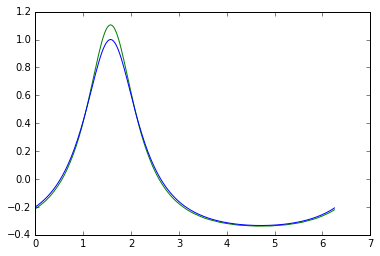

In [355]:
# This should be an operator that takes phi on boundary to normal derivative?

y = np.array([0.0,0.5])
phiB = freeG(points,y.reshape(2,1))
dphidn = np.linalg.inv(Gvals) @ dGdn @ phiB
#print(dphidn)

plt.plot(angles, dphidn, color='green')
#finite difference calculations of normal derivatvie
dphidn2 = (freeG(points*(1.00001),y.reshape(2,1)) - phiB) / 0.00001
plt.plot(angles,dphidn2-1, color='blue')
print(np.sum(dphidn))
print(np.sum(dphidn2-1)*dx)
#plt.plot(angles, phiB)


In [319]:
print(Gvals)

[[ 0.         -0.10871423 -0.08694225 ..., -0.07421064 -0.08694225
  -0.10871423]
 [-0.10871423  0.         -0.10871423 ..., -0.06518189 -0.07421064
  -0.08694225]
 [-0.08694225 -0.10871423  0.         ..., -0.05818326 -0.06518189
  -0.07421064]
 ..., 
 [-0.07421064 -0.06518189 -0.05818326 ...,  0.         -0.10871423
  -0.08694225]
 [-0.08694225 -0.07421064 -0.06518189 ..., -0.10871423  0.         -0.10871423]
 [-0.10871423 -0.08694225 -0.07421064 ..., -0.08694225 -0.10871423  0.        ]]


Working Pretty Well Shape wise. There seems to be a problem with overall shift and size. The integral equations come from assumption of no charge in interior.
The integral if normal derivatvie gives charge by gauss law
Hmmm. Ok that diagonal constant depends on the pi normalization. That makes sense.

In [217]:
def altCircleG(x,y):
    phi = freeG(points,y.reshape(2,1))
    sigma = np.linalg.solve(Gvals, phi)
    print(sigma)
    return freeG(x,y) - freeG(x.reshape(2,1), points) @ sigma

In [244]:
altCircleG(np.array([0.97,0.0]), np.array([0.5,0.3]))

[ 0.14762368  0.23008417  0.32870361  0.42535298  0.48230924  0.46707841
  0.38911194  0.28811012  0.19486923  0.1201309   0.06348543  0.02123874
 -0.0103412  -0.03419063 -0.05243986 -0.06659403 -0.07771242 -0.08654509
 -0.0936288  -0.09935237 -0.10400088 -0.1077857  -0.11086499 -0.11335793
 -0.11535458 -0.11692284 -0.11811339 -0.11896311 -0.11949746 -0.11973209
 -0.11967379 -0.11932088 -0.11866311 -0.11768107 -0.11634495 -0.11461273
 -0.11242734 -0.10971271 -0.10636815 -0.10226032 -0.09721183 -0.0909848
 -0.08325705 -0.07358702 -0.06136215 -0.04572261 -0.02545016  0.00118639
  0.03662081  0.08413235]


3.7554101474628481

Use direct conjugate y for comparison wothout having to subtract off.

1.5848874455e-14
8.82056830493e-12


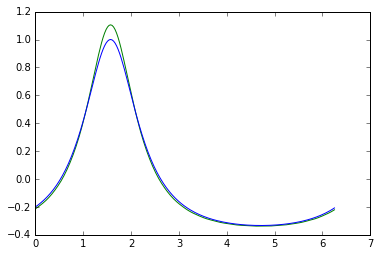

In [351]:
# This should be an operator that takes phi on boundary to normal derivative?

y = np.array([0.0,0.5])
phiB = freeG(points,y.reshape(2,1))
dphidn = np.linalg.inv(Gvals) @ dGdn @ phiB
#print(dphidn)

plt.plot(angles, dphidn, color='green')
#finite difference calculations of normal derivatvie
phiB = freeG(points,conjugate(y).reshape(2,1))
dphidn2 = -(freeG(points*(1.00001),conjugate(y).reshape(2,1)) - phiB) / 0.00001
plt.plot(angles,dphidn2, color='blue')
print(np.sum(dphidn)*dx)
print(np.sum(dphidn2)*dx)
#plt.plot(angles, phiB)

Strong oscillations appear as you approach the boundary
They match until charge goes outside boundary. Probably due to sign of normal derivtative?

In [215]:
dtheta

0.12566370614359174

I'm confused somewhere in here. Ok. So a 

In [220]:
def greenRep(x,phi):
    #phi = freeG(points,y.reshape(2,1))
    sigma = np.linalg.solve(Gvals, phi)
    return freeG(x.reshape(2,1), points) @ sigma

In [ ]:


def altCircleG2(x,y):
    phi = freeG(points,y.reshape(2,1))
    sigma = np.linalg.solve(Gvals, phi)
    print(sigma)
    return freeG(x,y) - freeG(x.reshape(2,1), points) @ sigma

In [ ]:
#Comparison to FEM? To show actually working
# More exact solution comparisons? I have some 2D exact, but how many 3d do I have?
# restriction from square domain.
ExteriorProj = np.diag(f(xs,ys) > 0) 
InteriorProj = np.diag(f(xs, ys) < 0) 
BoundaryProj = np.diag(f(xs, ys) == 0) 


Put into double integral form. Pick 2 points from joint distribution with probability that is local rank density? (Whatever that means.)
And probably do everything symmettrically between them.
or smaple from big joint distro that?

Green's theorem:
Derivatvie is anturally a rectangular operator.
A - A^T = boundary terms
if A is the pure rectangular operator


What is the BEM?
Ordinary 
I have been conceiving it as a fixup for the free Green's function

The 1-d case is the simplest usually
The 1d case of the BEM is so stupid. But maybe that is why I should do it


The semantics of the Green's identity?



A functional interface for the boundary values
A functional interface for interior values.
BEM(boundary values) -> u(x) 
It IS linear in these boundary values however.
So the impulse Boundary values response 
BEM = [u(x)]
which is a matrix kind of. One index (the list index) on the boundary, one (a functional index) in the interior
BEM = u(x,gamma)
where integration with respect to gamma.
This feels weird compared to G. u is dimensionless? Since boudnary values already have dimension of field
G = G0 - u @ G0
where the @ is summation on boundary gamma
u can be converted to neumann value extension matrix via precompositon with dirichlet to neumann operator
Effective boundary source terms due to interior sources?


The dirichlet to neumann operator


Block decomposition of interior and boundary

The circle
The square grid
The sphere

## Particle Filter

Doesn't the particle filter feel like a good use for erlang? Every process flying around keeps track of a particle.
Asynchronous duplication and death with chemical potential keeping the number about right.
Would be pretty cool for insane scale particle filters.

In [107]:
nparticles = 1000
dstate = 3
prior = np.random.rand(dstate, nparticles)

def dynamicstep(prior, dt):
    return prior +  0.1 * np.random.randn(dstate, nparticles) # applying p(x_t+1 | x_t)

def observation(y, guesses):
    weights = np.exp(-(y-guesses)**2) #w = p(y|x)
    return weights

def resample(weights, prior):
    #cumweights = np.cumsum(weights)
    #cumweights = cumweights/cumweights[-1]
    #= np.random.rand(nparticles).sort()
    return np.random.choice(prior, nparticles, p=weights/np.sum(weights))
    
    
    


## Delay Estimation

In [45]:
T = 100.0
N = 100000
ts = np.linspace(0,T,N)
dt = T/N

In [30]:
def upconvert(I, Q, f):
    return np.sin(f* np.pi * 2 * ts) * I + np.cos(f* np.pi * 2 * ts) * Q

def downconvert(sig, f):
    return np.sin(f* np.pi * 2 * ts) * sig,  np.cos(f* np.pi * 2 * ts) * sig


In [50]:
sig = np.sin(ts)

In [57]:
def delay(sig, tau):
    a = int(tau//dt)
    return np.concatenate( (sig[-a:], sig[:N-a]))

In [59]:
observedSig = delay(sig,1)

In [58]:
delay(sig,1).shape

(100000,)

In [52]:
sig.shape

(100000,)

In [62]:
signal.correlate(sig,observedSig).shape

(199999,)

In [60]:
import scipy.signal as signal

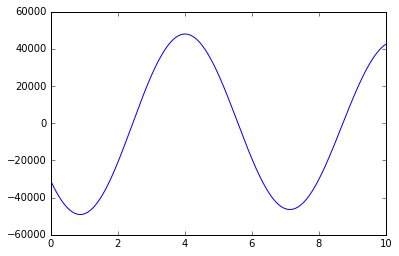

In [77]:
observedSig = delay(sig,4) + 10 * np.random.randn(N) 
plt.plot(ts[:10000], signal.correlate(observedSig,sig)[N:N+10000])

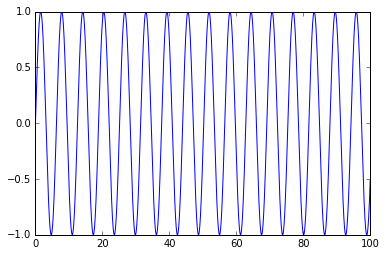

In [78]:
plt.plot(ts,sig)

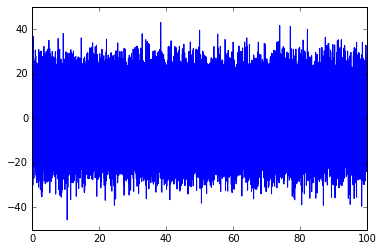

In [79]:
plt.plot(ts,observedSig)

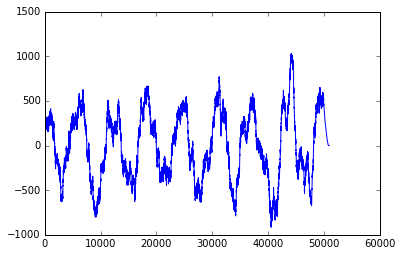

In [86]:
plt.plot(signal.correlate(observedSig[:50000],sig[:1000]))

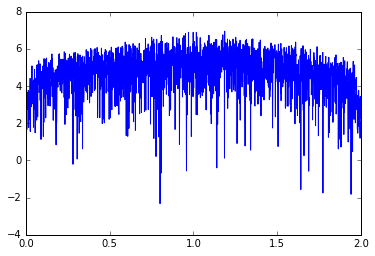

In [106]:
N = 1000
sig = np.random.randn(N)
observedSig = delay(sig,4) + 10 * np.random.randn(N) 
power = np.log(np.abs(signal.correlate(observedSig,sig)))
plt.plot(ts[:2*N-1],power)

You need to sample enough to pull out of noise floor. Long sample times need good local clock accuracy though.

In [102]:
sig.shape

(100000,)

In [103]:
observedSig.shape

(100000,)

In [104]:
power.shape

(199999,)

Phase Noise - local time uncertainty in the downsampling process.

Bandwidth - Gives you total range of time uncertainty - shift by one period?